In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import pearsonr
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [32]:
import os 
import openpyxl

curr_path = os.getcwd()
input_path = os.path.join(curr_path,'S&P500-EPS.xlsx')
df = pd.read_excel(
    input_path,
    engine='openpyxl',
    header=None,
    skiprows = 1
)

df.columns = ['Date', 'SP500-PE', 'SP500-Price', 'SP500-EPS', 'SP500-Index']
df.dropna(axis=0, how='any', inplace=True)

In [33]:
df

,Date,SP500-PE,SP500-Price,SP500-EPS,SP500-Index
0,2021-03-01,41.54,3910.51,94.138421,1603.291856
1,2021-02-01,41.26,3883.43,94.120940,1602.994143
2,2021-01-01,40.30,3793.75,94.137717,1603.279871
3,2020-12-01,39.26,3695.31,94.124045,1603.047015
4,2020-11-01,37.16,3548.99,95.505651,1626.577454
...,...,...,...,...,...
615,1969-12-01,15.76,91.11,5.781091,98.459021
616,1969-11-01,16.54,96.21,5.816808,99.067314
617,1969-10-01,16.32,95.52,5.852941,99.682710
618,1969-09-01,16.05,94.51,5.888474,100.287869


## Find Peak and Trough

In [ ]:
# find the local min and local max
from scipy.signal import argrelextrema
ilocs_min = argrelextrema(df['SP500-Index'].values, np.less_equal, mode = 'wrap', order = 12)[0]
ilocs_max = argrelextrema(df['SP500-Index'].values, np.greater_equal, mode = 'wrap', order = 12)[0]

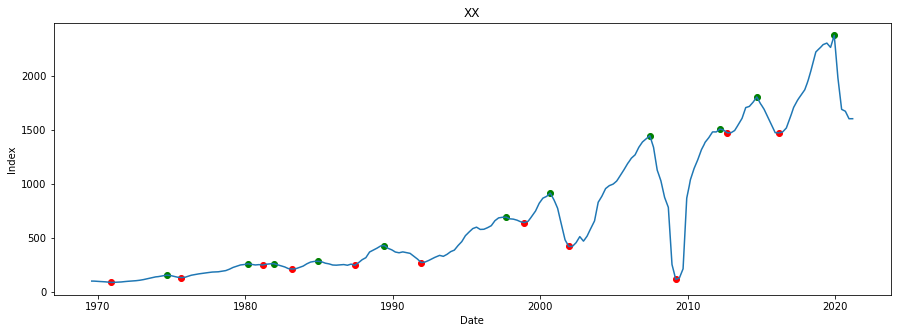

In [66]:
# plot 
y = df['SP500-Index']
x = df['Date']
plt.figure(figsize=(15,5))
plt.plot(x, y)
plt.scatter(df.iloc[ilocs_min]['Date'], df.iloc[ilocs_min]['SP500-Index'], color = 'red')
plt.scatter(df.iloc[ilocs_max]['Date'], df.iloc[ilocs_max]['SP500-Index'], color ='green')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('XX')
plt.show()
#sns.lineplot(df['Date'], df['SP500-Index'])

In [67]:
# get the anormal event date
peak_date = df.iloc[ilocs_min]['Date']
trough_date = df.iloc[ilocs_max]['Date']

## Find Cycle(Short term contraction, Long term growth, irregular)

In [70]:
import pandas as pd
from cydets.algorithm import detect_cycles

# create sample data
#series = pd.Series([0, 1, 0, 0.5, 0, 1, 0, 0.5, 0, 1, 0])

# detect cycles
cycles = detect_cycles(df['SP500-Index'])

In [74]:
cycles.loc[cycles['doc'] >= 0.05]

,t_start,t_end,t_minimum,doc,duration
3,21,78,60,0.145333,57
7,112,165,144,0.581167,53
9,165,246,231,0.215935,81
14,306,381,351,0.068804,75
